# Predicting Energy Needs Of Buildings
Predicting two variables Heating Load and Cooling Load of different Buildings based on their dimensions and Materials is the objective of this project. The Linear Regression model is used for prediction in this project

# Importing Libraries 
Importing Standard Libraries such as pandas, numpy,etc.

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import openpyxl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Dataset Creation
Created the dataset using the csv file which was imported locally from the device (This can be replaced with the link)

In [6]:
df=pd.read_excel('ENB2012_data.xlsx')
df.columns = [
    'Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
    'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution',
    'Heating_Load', 'Cooling_Load'
]
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


# Checking For Null Values
No null values were found. Hence, This dataset is ready for further steps

In [7]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

# Data Exploration Through Graphs
Using various graph to explore and learn about the dataset

Target column distribution reveals that most of heating load and cooling load values lies around 10-15 & 15-17(approx.) respectively

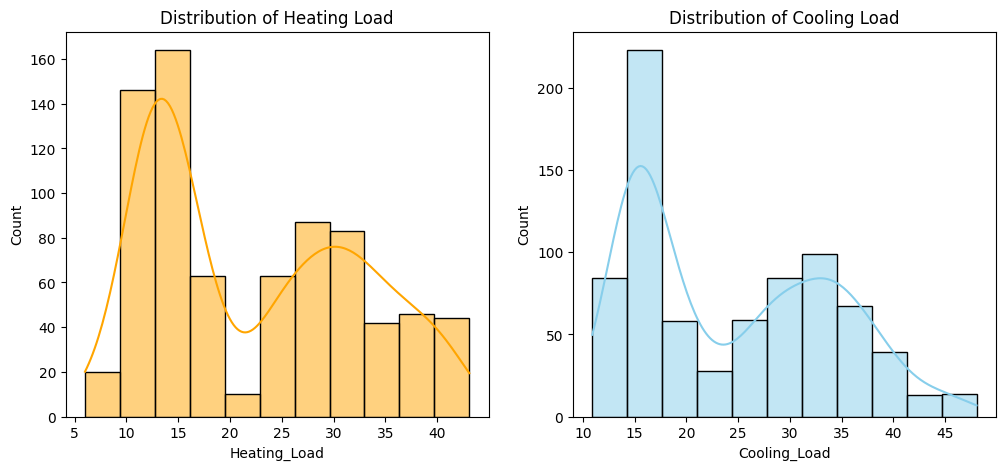

In [8]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Heating_Load'], kde=True, color='orange')
plt.title('Distribution of Heating Load')

plt.subplot(1,2,2)
sns.histplot(df['Cooling_Load'], kde=True, color='skyblue')
plt.title('Distribution of Cooling Load')
plt.show()


Building a correlation matrix and visualizing that shows us the correlation of the numerical features of the dataset

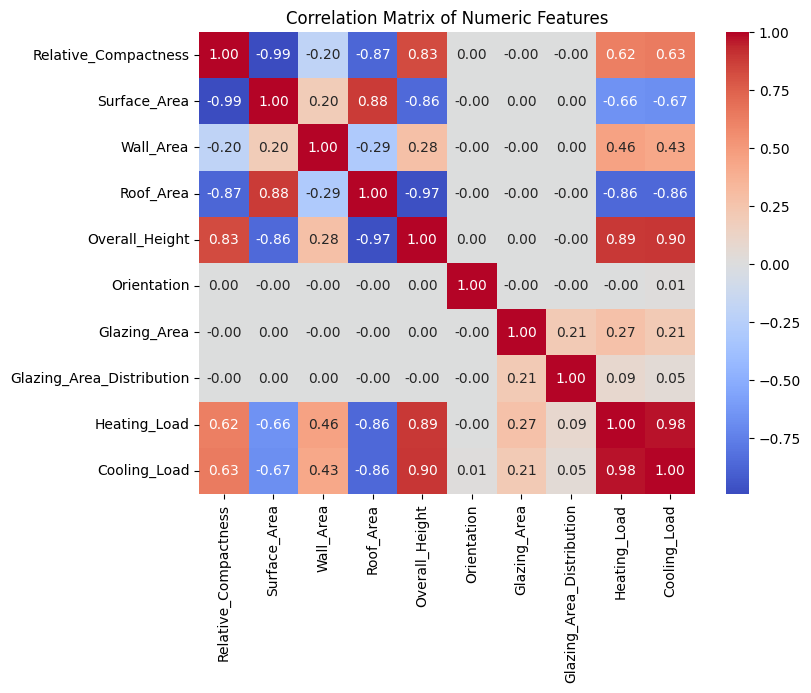

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

# Model Training & Evaluation
Created a function that helps us that trains and evaluates the model

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
def evaluate_regression_model(data, X, y, test_size=0.2, cv=5, random_state=42):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=test_size, random_state=random_state)

    model = LinearRegression()
    # Fit model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Accuracy (R²)
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    # Cross-validation
    cv_scores = cross_val_score(model, X, y, cv=cv)
    cv_mean = cv_scores.mean()

    # Evaluation metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    # Overfitting check
    if test_acc < cv_mean - 0.05:
        overfit_note = "⚠️ Possible overfitting detected (test accuracy below CV mean)"
    else:
        overfit_note = "✅ Model seems to generalize well"

    # Print results neatly
    print("📊 Regression Model Evaluation")
    print("--------------------------------")
    print(f"Train R²: {train_acc:.4f}")
    print(f"Test R²: {test_acc:.4f}")
    print(f"5-Fold CV Mean R²: {cv_mean:.4f}")
    print(overfit_note)
    print("--------------------------------")
    print(f"R² Score: {r2:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"MAE: {mae:.3f}")
    print("--------------------------------")

    return model


Model trained for predicting Heating Load has shown R² score of 0.91, the model seems to generalize well with no signs of overfitting

In [11]:
X = df[['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
        'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution']]
y = df['Heating_Load']

results = evaluate_regression_model(df, X, y)


📊 Regression Model Evaluation
--------------------------------
Train R²: 0.9171
Test R²: 0.9122
5-Fold CV Mean R²: 0.8903
✅ Model seems to generalize well
--------------------------------
R² Score: 0.912
RMSE: 3.025
MAE: 2.182
--------------------------------


Model trained for predicting Cooling Load has shown R² score of 0.89, the model seems to generalize well with no signs of overfitting as well 

In [12]:
X = df[['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
        'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution']]
y = df['Cooling_Load']

results = evaluate_regression_model(df, X, y)


📊 Regression Model Evaluation
--------------------------------
Train R²: 0.8859
Test R²: 0.8932
5-Fold CV Mean R²: 0.8752
✅ Model seems to generalize well
--------------------------------
R² Score: 0.893
RMSE: 3.145
MAE: 2.195
--------------------------------


# Prediction and Conclusion
Using the model to predict the target columns and Visualize the results

Building and predicting the results by using the entire dataset 

In [13]:
final_model = LinearRegression()
# Fit model
y=df['Heating_Load']
final_model.fit(X, y)
df['predicted_heatload'] = final_model.predict(X)
y=df['Cooling_Load']
final_model.fit(X, y)
df['predicted_coolload'] = final_model.predict(X)

Distribution of the predicted results show us results similar to the original data but with notable difference due to the predictive power

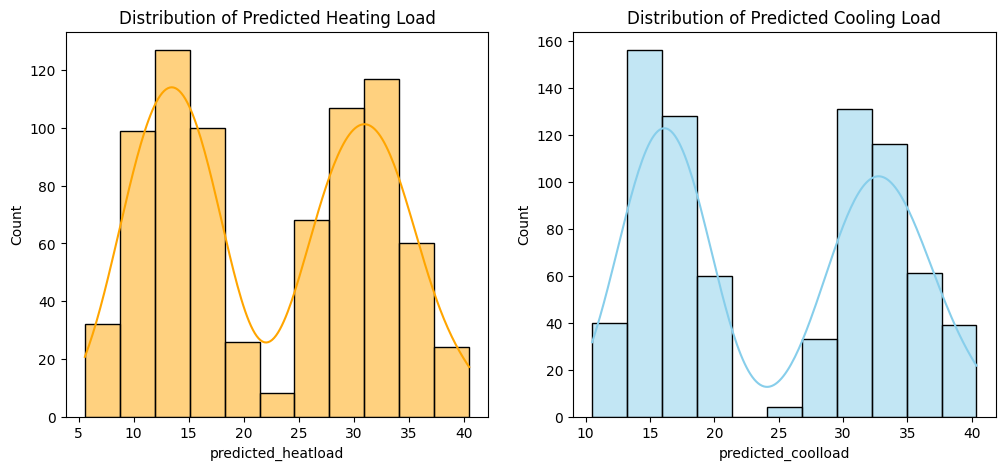

In [14]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['predicted_heatload'], kde=True, color='orange')
plt.title('Distribution of Predicted Heating Load')

plt.subplot(1,2,2)
sns.histplot(df['predicted_coolload'], kde=True, color='skyblue')
plt.title('Distribution of Predicted Cooling Load')
plt.show()


The residuals plot shows us that the values are centered around zero and their is no obvious trend in the dataset 

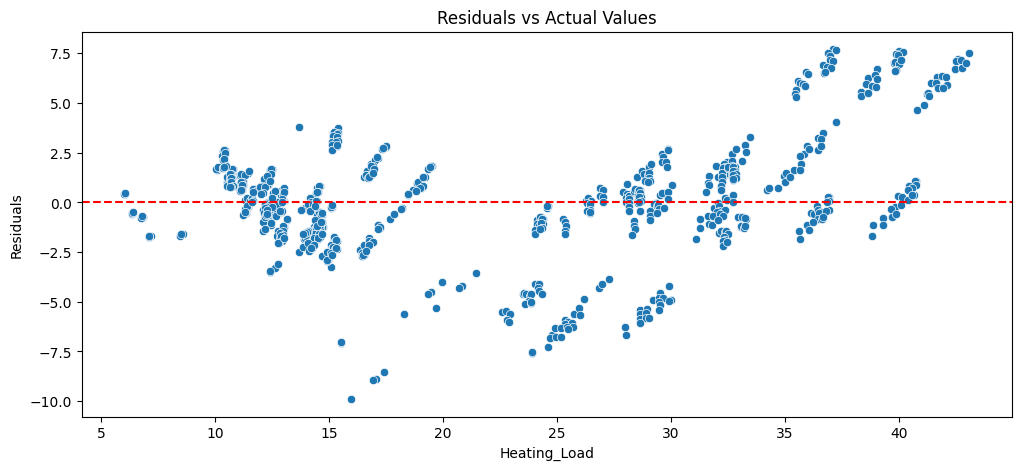

In [15]:
plt.figure(figsize=(12,5))
residuals = df['Heating_Load'] - df['predicted_heatload']
sns.scatterplot(x=df['Heating_Load'], y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.ylabel("Residuals")
plt.title("Residuals vs Actual Values")
plt.show()

The residuals plot shows us that again the values are centered around zero and their is no obvious trend in the dataset

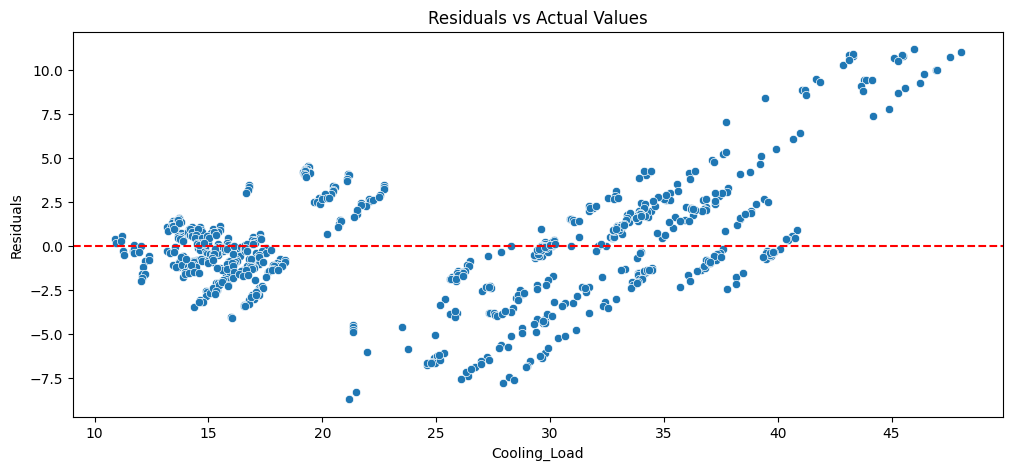

In [16]:
plt.figure(figsize=(12,5))
residuals = df['Cooling_Load'] - df['predicted_coolload']
sns.scatterplot(x=df['Cooling_Load'], y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.ylabel("Residuals")
plt.title("Residuals vs Actual Values")
plt.show()

# Conclusion
The regression analysis on the Energy Efficiency dataset successfully modeled the relationship between building characteristics and heating load. Using features such as Relative Compactness, Surface Area, Wall Area, Roof Area, Overall Height, Orientation, Glazing Area, and Glazing Area Distribution, the Linear Regression model achieved a good predictive performance.

The evaluation metrics — R², RMSE, and MAE — indicate that the model predicts well with accuracies of 91 and 89 for respective targets.
Residual analysis showed that the errors were mostly random and centered around zero, suggesting that the model’s assumptions hold and that it generalizes well without major bias.

However, some minor deviations in residuals imply that non-linear models (like Random Forest or Gradient Boosting) could further improve accuracy by capturing more complex relationships among building features.
